<a href="https://colab.research.google.com/github/lrclark24/DSTEPproject/blob/main/DSTEP_Project_ipynb_Lydia_Rose_Clark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction/Background**

My name is Lydia Clark, and for my project I will be performing data analysis to review the relationship between carbon dioxide(CO2) emissions and coral reefs. Carbon dioxide is a byproduct from burning fossil fuels (ex.oil, gasoline), and is released into the atmosphere. Due to the composition of CO2, its molecules remain in the atmosphere for long period of time, and trap heat radiating from the sun. This trapped heat causes the atmospheric temperature to rise, causing weather fluctuations and warmer temperature. This is presently known as climate change, and it is having many impacts on our environment (Lindsay, 2023). It is causing heat waves and droughts to occurs more frequently in some areas, causing water scarcity and more heat-related deaths. Warmer temperatures also causes ice caps to melt, which not only releases heat into the ocean, but also causes sea levels to rise because more water is being added. More flooding will occur, making some areas uninhabitable. Oceans are warming to due increased temperatures, which is causing shifts in marine ecosystems.

Aside from causing temperature to increase, carbon emissions also impact marine ecosystems. When CO2 is released, it gets absorbed by the ocean, and creates carbonic acid. This acid lowers the ocean's pH, making it more acidic, which can be detrimental to marine organisms. It can break down the shell or skeleton of calcifying organisms, making them weaker and more susceptible to disturbances like disease (NOAA, 2023).

One ecosystem that is particularlyl vulnerable to these events are coral reefs. Coral reefs tend to be found in tropical, shallow, clear-water areas. This is because they can only stand certain water temperatures, and if the temperature fluctuates, the coral can be put under stress. They are in shallow areas where light can penetrate the water, which allows the algae inside of them, Zooxanthellae, to photosynthesize. Energy is then produced, and provided to the coral. But, if water temperatures get too warm, the coral is put under stress, and will eventually expel their Zooxanthellae. Afterwards, the coral starts to die, and what remains is a stark, white structure. This is known as coral bleaching (Dempsey, 2023). Coral bleaching is being seen increaseingly around the world, and it is harmful due to the amount of organisms that rely on coral reefs. Not only is coral bleaching an issue, but because corals are calcifying organisms, ocean acidification is causing them to weaken. They may become more susceptible to diseases, and can't build themselves properply because the acidic environment is breaking them down .

Why is this a concern? Coral reefs are biodiverse, productive areas where other organisms can feed, reproduce, hide, and live. When these reefs are bleaching, the ecosytem collapses. This will cause the populations of other organisms, like fish, to decline, which can impact humans. If there are less fish in the water, there will be fewer fish to catch, and we will see a loss in revenue and food supply. Reefs can also act as barriers against storms, reducing storm damages and lessening surges. They are a vital part of marine ecosystems, and provide irreplaceable services.

With this information, for my project I will be looking at how ocean acidification and coral bleaching are impacted by CO2 emissions. I will do a time series analysis to see how CO2 emissions have changed over the years, and look at ocean acidification data to see if there is trends in the data. I will also be looking at maps of particular reefs to see where they are located, and understand where bleaching is occurring. I will primarily be looking at data found in Florida reefs, because the majority of US reefs can be found near Florida, making it an important recreational and biodiverse area. From my analysis, I will see if there is correlation between ocean acidification and bleaching, to emphasize the impacts of CO2 emissions and the need for further reef restoration.  



# **Data Analysis**

I start by downloading packages, and extracting datasets with relevant information.

**Data Dictionary**

Use this link to see my data dictionary:
https://docs.google.com/document/d/1ZBxcxPQQ7F0lYrWmx7NgdC_VNMBb4dzP-iRDKookc2c/edit?usp=sharing

Note: this is a living document

In [2]:

#importing packages I need

import os
!pip install wget
import wget
import numpy as np
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
import shapely.geometry as shg
import calendar #can use this to make a calendar showing how co2 emissions have changed over the years (identify trends?)


  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=511ed2c7419e6865c643c4eca719bbfdd86e187fb166c7719f1f9528f95cfd4f
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


For the majority of this project, I will be looking at trends for the US, but I will transition the discussion to a reef in Florida towards the end.

##Emissions

In [33]:
#This will be my emissions dataset from: https://github.com/owid/co2-data

fname = "https://nyc3.digitaloceanspaces.com/owid-public/data/co2/owid-co2-data.csv"
ems = pd.read_csv(fname)

ems = ems.loc[(ems['country'] == 'United States')] #only using data from the US to simplify
us_emissions = ems.dropna() #getting rid of Nans
us_emissions


,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
45746,United States,1990,USA,248083728.0,9.250378e+12,33.484,0.135,5120.957,-11.249,-0.219,...,11.008,21.027,0.038,0.156,0.201,0.008,5448.74,5855.54,-72.927,-1.424
45747,United States,1991,USA,251560192.0,9.243499e+12,32.736,0.130,5062.957,-58.000,-1.133,...,11.275,20.896,0.038,0.158,0.204,0.008,5403.58,5810.38,-101.685,-2.008
45748,United States,1992,USA,255175328.0,9.572148e+12,32.993,0.129,5174.228,111.271,2.198,...,11.176,20.783,0.038,0.161,0.206,0.008,5487.86,5894.66,-26.001,-0.503
45749,United States,1993,USA,258779760.0,9.834941e+12,34.838,0.135,5272.851,98.623,1.906,...,10.883,20.681,0.038,0.163,0.209,0.008,5599.07,6006.01,-65.368,-1.240
45750,United States,1994,USA,262273584.0,1.023202e+13,36.310,0.138,5364.279,91.429,1.734,...,11.400,20.581,0.038,0.165,0.211,0.008,5693.42,6100.51,-51.724,-0.964
45751,United States,1995,USA,265660560.0,1.051026e+13,37.075,0.140,5425.259,60.980,1.137,...,12.351,20.478,0.038,0.168,0.214,0.008,5761.90,6168.77,-52.810,-0.973
45752,United States,1996,USA,268984352.0,1.090917e+13,37.309,0.139,5612.983,187.723,3.460,...,13.027,20.380,0.038,0.170,0.217,0.008,5933.25,6338.95,-72.590,-1.293
45753,United States,1997,USA,272395424.0,1.139876e+13,38.561,0.142,5688.142,75.160,1.339,...,12.938,20.278,0.038,0.173,0.219,0.009,6193.38,6600.80,-42.136,-0.741
45754,United States,1998,USA,275835008.0,1.190603e+13,39.461,0.143,5733.281,45.138,0.794,...,13.579,20.198,0.038,0.175,0.222,0.009,6241.11,6646.95,78.353,1.367
45755,United States,1999,USA,279181568.0,1.246382e+13,40.239,0.144,5803.918,70.637,1.232,...,13.739,20.118,0.038,0.178,0.225,0.009,6242.51,6647.80,186.229,3.209


First I will be using this dataset to graph CO2 emissions over time. I am only using data from the United States, as this is the area I am focusing on. Here, I created two graphs. One shows how the US population changes over time, and the other plotting emissions and consumption. Note, the time period for this data is 1990-2015.

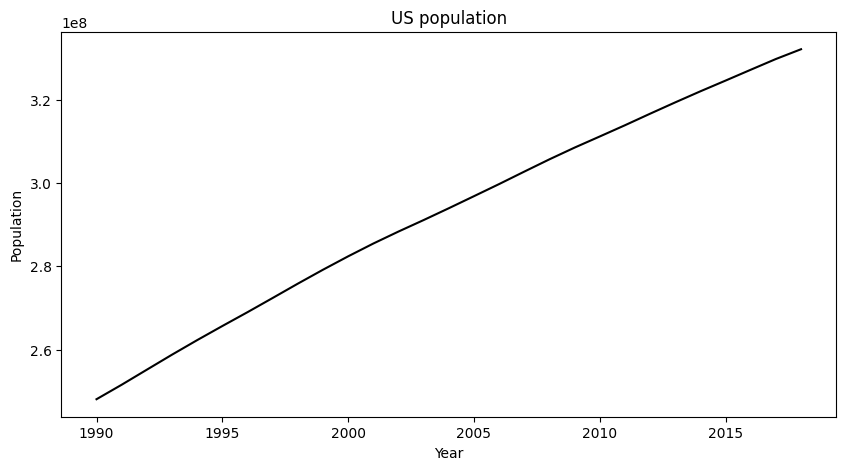

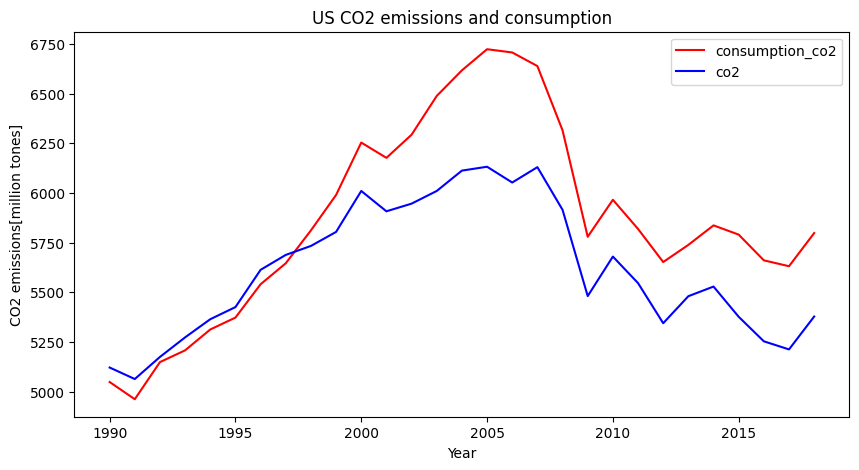

In [ ]:
#us_emissions graphs

#looking at population growth
fig, ax = plt.subplots(figsize=(10, 5))
us_emissions.plot.line("year", "population", xlabel="Year", ylabel="Population", title = "US population", color = "black", ax=ax, legend = False)
fig.show()

#looking at co2 consumption
fig, ax = plt.subplots(figsize=(10, 5))
us_emissions.plot.line("year", "consumption_co2", xlabel="Year", ylabel="CO2 consumption", title = "US CO2 consumption", color="red", ax=ax, legend = True)
fig.show()

#co2 emissions
us_emissions.plot.line("year", "co2", xlabel="Year", ylabel="CO2 emissions[million tones]", title = "US CO2 emissions and consumption", color="blue", ax=ax, legend = True)
fig.show()


#can use color bar?

#do analysis to find what year has the most emissions, and what year has the least emissions



**Figure 1**

In [ ]:
#finding the mean emissions
mean = us_emissions["co2"].mean()
print(mean)

5612.234344827587


In [ ]:
#I am going to sort the co2 values to see what years have the most/least emissions
us_emissions.sort_values(by=['co2'])

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
45747,United States,1991,USA,251560192.0,9.243499e+12,32.736,0.130,5062.957,-58.000,-1.133,...,11.275,20.896,0.038,0.158,0.204,0.008,5403.58,5810.38,-101.685,-2.008
45746,United States,1990,USA,248083728.0,9.250378e+12,33.484,0.135,5120.957,-11.249,-0.219,...,11.008,21.027,0.038,0.156,0.201,0.008,5448.74,5855.54,-72.927,-1.424
45748,United States,1992,USA,255175328.0,9.572148e+12,32.993,0.129,5174.228,111.271,2.198,...,11.176,20.783,0.038,0.161,0.206,0.008,5487.86,5894.66,-26.001,-0.503
45773,United States,2017,USA,329791232.0,1.759628e+13,40.324,0.122,5212.162,-40.770,-0.776,...,9.182,17.867,0.036,0.223,0.270,0.011,5728.79,5947.84,418.983,8.039
45772,United States,2016,USA,327210208.0,1.716256e+13,39.439,0.121,5252.932,-123.541,-2.298,...,9.510,18.007,0.036,0.221,0.268,0.011,5783.00,6003.24,407.795,7.763
45749,United States,1993,USA,258779760.0,9.834941e+12,34.838,0.135,5272.851,98.623,1.906,...,10.883,20.681,0.038,0.163,0.209,0.008,5599.07,6006.01,-65.368,-1.240
45768,United States,2012,USA,316651328.0,1.584964e+13,35.270,0.111,5344.086,-202.030,-3.643,...,11.099,18.590,0.036,0.212,0.258,0.010,5628.80,6036.58,308.129,5.766
45750,United States,1994,USA,262273584.0,1.023202e+13,36.310,0.138,5364.279,91.429,1.734,...,11.400,20.581,0.038,0.165,0.211,0.008,5693.42,6100.51,-51.724,-0.964
45771,United States,2015,USA,324607776.0,1.690258e+13,39.907,0.123,5376.473,-152.208,-2.753,...,10.287,18.148,0.036,0.219,0.265,0.011,5705.12,6112.06,413.808,7.697
45774,United States,2018,USA,332140032.0,1.814065e+13,38.971,0.117,5377.797,165.635,3.178,...,8.143,17.734,0.035,0.226,0.272,0.011,5935.52,6154.65,420.355,7.816


In [ ]:
us_emissions.sort_values(by=['co2_growth_prct'])

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
45765,United States,2009,USA,308512032.0,1.489429e+13,29.615,0.096,5480.726,-434.393,-7.344,...,10.502,19.035,0.037,0.204,0.251,0.010,5793.39,6184.15,298.723,5.450
45768,United States,2012,USA,316651328.0,1.584964e+13,35.270,0.111,5344.086,-202.030,-3.643,...,11.099,18.590,0.036,0.212,0.258,0.010,5628.80,6036.58,308.129,5.766
45764,United States,2008,USA,305694912.0,1.531973e+13,41.416,0.135,5915.119,-215.004,-3.507,...,10.939,19.166,0.037,0.202,0.249,0.010,6211.30,6601.05,400.232,6.766
45771,United States,2015,USA,324607776.0,1.690258e+13,39.907,0.123,5376.473,-152.208,-2.753,...,10.287,18.148,0.036,0.219,0.265,0.011,5705.12,6112.06,413.808,7.697
45767,United States,2011,USA,313876608.0,1.550930e+13,32.208,0.103,5546.116,-133.599,-2.352,...,10.775,18.749,0.037,0.209,0.256,0.010,5847.39,6254.96,272.792,4.919
45772,United States,2016,USA,327210208.0,1.716256e+13,39.439,0.121,5252.932,-123.541,-2.298,...,9.510,18.007,0.036,0.221,0.268,0.011,5783.00,6003.24,407.795,7.763
45757,United States,2001,USA,285470496.0,1.310047e+13,41.613,0.146,5907.740,-102.396,-1.704,...,12.468,19.943,0.038,0.183,0.230,0.009,6368.37,6759.41,269.150,4.556
45762,United States,2006,USA,299753088.0,1.509588e+13,46.851,0.156,6052.686,-79.497,-1.296,...,12.026,19.398,0.037,0.197,0.243,0.010,6293.17,6683.78,655.034,10.822
45747,United States,1991,USA,251560192.0,9.243499e+12,32.736,0.130,5062.957,-58.000,-1.133,...,11.275,20.896,0.038,0.158,0.204,0.008,5403.58,5810.38,-101.685,-2.008
45773,United States,2017,USA,329791232.0,1.759628e+13,40.324,0.122,5212.162,-40.770,-0.776,...,9.182,17.867,0.036,0.223,0.270,0.011,5728.79,5947.84,418.983,8.039


Figure 1 above contains graphs on US population growth, and CO2 emissions and consumption. From the population growth graph, we can see that US population has been increasing linearly. Looking at the next graph, we see that CO2 emissiona and consumption are closely correlated. When consumption increases, so do emissions. We can also see that between 1990 and 2005, population, emissions, and consumption are all increasing. 2005 is the year where we see the most emissions and consumption. But, after 2005, emissions and consumption start to decline, while population continues to increase. This could be due to the development of cleaner technologies, but overall we see that emissions and consumption fluctuate. The average amount of emissions during this time period is about 5614.90 million tonnes. As of 2021 the average increased to 6340.2 million tonnes, so emissions have increased since this data was published.

https://www.epa.gov/ghgemissions/inventory-us-greenhouse-gas-emissions-and-sinks

The most amount of CO2 was emitted in 2005 at 6137.604 million tonnes, and the the fewest emissions was in 1991 at 5064.987 million tonnes. As time goes by, emissions have increased. This could be because population has increased, so more people are producing emissions. Looking at the growth percent, 2009 had the largest decline in emissions, -7.364%. On the contrast, 2010 saw the largest percent growth, 3.619%. This is interesting, because these years are very close to each other, so there must have been some kind of shift that caused people to use more emissions in a relatively short period of time.

Now that we have some information on emissions, we can see if there is a relationship between emissions and environmental concerns. First, we can look at how CO2 affects ocean temperatures. As mentioned before, having more CO2 trapped in the atmosphere causes temperatures to increase, so we can see if temperatures are increasing as emissions increase.

##Ocean Temperature

Let's look at how ocean temperature has changed from 1990 to 2015.

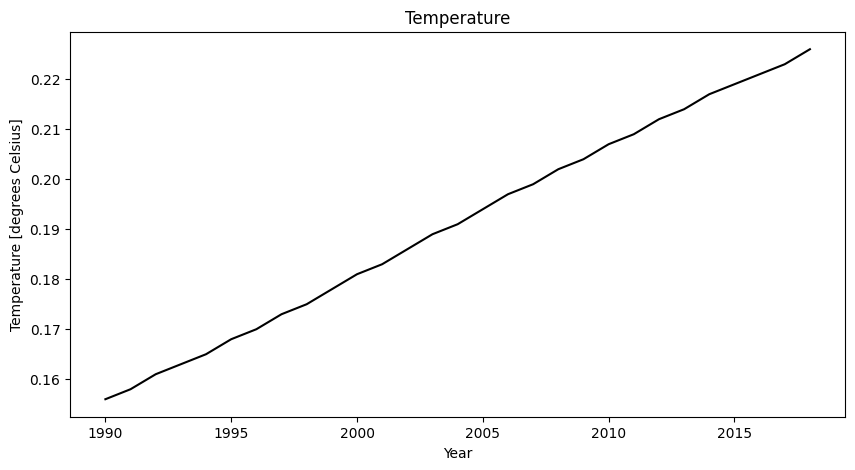

In [ ]:
#graph how ocean temperatures have increased
fig, ax = plt.subplots(figsize=(10, 5))
us_emissions.plot.line("year", "temperature_change_from_co2", xlabel="Year", ylabel="Temperature [degrees Celsius]", title = "Temperature", color="k", legend = False, ax=ax)
fig.show()


**Figure 2**

Figure 2 is showing how the ocean temperature (in degrees Celsius) changes from 1990 to 2015. It shows us that ocean temperatues have been increasing during this time period. Given that emissions have also increased, we can see that there is a relationship between ocean temperatures and emissions. This further supports the information on how emissions impact marine environments.

We can look at another graph of ocean temperature, over a longer time scale. This graph starts in March of 1955 and ends in December of 2017, so there is more data present here. The graph also provides a better shape of the data.

In [ ]:
#changes in ocean heat from:
#https://www.climate.gov/news-features/understanding-climate/climate-change-ocean-heat-content
cname = "https://www.ncei.noaa.gov/data/oceans/woa/DATA_ANALYSIS/3M_HEAT_CONTENT/DATA/basin/3month/ohc_levitus_climdash_seasonal.csv"
heat = pd.read_csv(cname)
print(heat)


      1955-3  -2.870669
0     1955-6  -0.112888
1     1955-9  -1.814083
2    1955-12  -8.006949
3     1956-3  -2.414768
4     1956-6  -4.435912
..       ...        ...
268   2022-6  19.380640
269   2022-9  18.949022
270  2022-12  20.357370
271   2023-3  20.709352
272   2023-6  20.349693

[273 rows x 2 columns]


These column names won't work for what I want to do, so I need to change them.

In [ ]:
#changing heat column names
heat.rename(columns={heat.columns[0]: 'Date', heat.columns[1]: 'Temp_change'},inplace=True)
heat

,Date,Temp_change
0,1955-6,-0.112888
1,1955-9,-1.814083
2,1955-12,-8.006949
3,1956-3,-2.414768
4,1956-6,-4.435912
...,...,...
268,2022-6,19.380640
269,2022-9,18.949022
270,2022-12,20.357370
271,2023-3,20.709352


I want to make this an interactive plot, so I need to download the appropriate packages to do so; I will be using plotly here.

In [38]:
#using plotly
!pip install plotly_express
!pip install ipympl

from google.colab import output
output.enable_custom_widget_manager()

import plotly_express as px

%matplotlib widget

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.4 MB/s eta 0:00:00


I am going to create a data dictionary, so I can manipulate the data correctly.

In [ ]:
tmp = {"Date":"Date", "Temp_change": "Temp_change"}

tmp = dict(Date = "Date", Temp_change = "Temp_change")
tmp

{'Date': 'Date', 'Temp_change': 'Temp_change'}

In [ ]:
fig = px.line(heat, x = "Date", y = "Temp_change", title = "Time series of ocean temperature", color_discrete_sequence=["darkblue"],
              labels = dict(Temp_change = "Temp_change(degrees C)", Date = "Date"), width = 900, height = 500 ) \
              .update_traces(line = dict(width = 0.75)) \
              .update_layout(plot_bgcolor = "whitesmoke", hoverlabel = dict(bgcolor = "whitesmoke"))
fig.show()

**Figure 3**

We can also use this data to do some summary statistics.

In [ ]:
temp_mean = heat["Temp_change"].mean()
print(temp_mean)

3.5168329267399274


In [ ]:
print(heat.max())

Date              2023-6
Temp_change    20.709352
dtype: object


Figure 3 is a time series showing how ocean temperatures have changed during the stated time period. It tells us how ocean temperature has changed between the recorded dates, and provides a better visual. This is an interactive plot, so if you hover over the lines on the graph, you can see the exact change in temperature during the time period. Negative values imply a decrease in temperature, whereas positice values imply a temerature increase. The average temperature change is 3.5 degrees C, with the largest change being 20.7 degrees C.  This graph shows more fluctuations than figure 2, but the overall trend is the same: ocean temperatures are increasing.

##Ocean pH

Next, let's see how the ocean's pH has changed. As I mentioned previously, as more carbon dioxide enters the ocean, the water becomes more acidic. We want to graphically show this relationship to understand it better.

In [29]:
#CODAP-NA ph_insitu_calculated from https://www.ncei.noaa.gov/data/oceans/ncei/ocads/metadata/0219960.html
fname = 'https://www.ncei.noaa.gov/data/oceans/ncei/ocads/data/0219960/Data_CODAP/CSV/CODAP_NA_v2021.csv'
data = pd.read_csv(fname)

#I am only going to use the pH insitu calculated column from this dataset: pH_TS_insitu_calculated
pH_data = data.iloc[1: , :] #dropping first row
pH_data['pH_TS_insitu_calculated'] = pH_data['pH_TS_insitu_calculated'].astype(float) #making this a float
pH_data

<ipython-input-29-a506a650f3cd>:3: DtypeWarning: Columns (0,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(fname)
<ipython-input-29-a506a650f3cd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pH_data['pH_TS_insitu_calculated'] = pH_data['pH_TS_insitu_calculated'].astype(float) #making this a float


,Accession,EXPOCODE,Cruise_flag,Cruise_ID,Observation_type,Profile_number,Station_ID,Cast_number,Niskin_ID,Niskin_flag,...,Nitrate,Nitrate_flag,Nitrite,Nitrite_flag,Nitrate_and_Nitrite,Nitrate_and_Nitrite_flag,recommended_Nitrate_and_Nitrite,recommended_Nitrate_and_Nitrite_flag,Ammonium,Ammonium_flag
1,144549,33HQ20080329,B,HLY0802,Niskin,1,1,5,1,2,...,25.8,2,0.19,2,25.99,2,25.99,2,0.14,2
2,144549,33HQ20080329,B,HLY0802,Niskin,1,1,5,2,2,...,25.6,2,0.2,2,25.8,2,25.8,2,0.13,2
3,144549,33HQ20080329,B,HLY0802,Niskin,1,1,5,3,2,...,24,2,0.15,2,24.15,2,24.15,2,0.41,2
4,144549,33HQ20080329,B,HLY0802,Niskin,1,1,5,4,2,...,22.6,2,0.17,2,22.77,2,22.77,2,-999,9
5,144549,33HQ20080329,B,HLY0802,Niskin,1,1,5,5,2,...,21.5,2,0.16,2,21.66,2,21.66,2,0.15,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28202,208230,3.3222E+11,A,SH1709,Niskin,3391,HB07,1,7,2,...,-999.0,9,-999.0,9,-999.0,9,-999.0,9,-999.0,9
28203,208230,3.3222E+11,A,SH1709,Niskin,3391,HB07,1,8,2,...,-999.0,9,-999.0,9,-999.0,9,-999.0,9,-999.0,9
28204,208230,3.3222E+11,A,SH1709,Niskin,3391,HB07,1,9,2,...,-999.0,9,-999.0,9,-999.0,9,-999.0,9,-999.0,9
28205,208230,3.3222E+11,A,SH1709,Niskin,3391,HB07,1,10,2,...,-999.0,9,-999.0,9,-999.0,9,-999.0,9,-999.0,9


Some of the pH values were written in as -999.000, so I dropped any rows with that value because it would skew the results.

In [30]:
new_pH = pH_data[pH_data.pH_TS_insitu_calculated != -999.000] #getting rid of rows with this number

new_pH.loc[:,"pH_TS_insitu_calculated"] #making sure it worked properly

1        7.9743
2        7.9977
3        8.0398
4        8.0659
5        8.0661
          ...  
28199    7.8849
28201    7.9567
28203    7.9997
28204    8.0176
28205    8.0186
Name: pH_TS_insitu_calculated, Length: 17716, dtype: float64

Now I want to create a subdataframe only showing me the pH, and the year it was recorded. This will make it easier for me to create a time series analysis. I am only using the year because I want to look at overall trends.

In [31]:
pH_year = new_pH[['Year_UTC', 'pH_TS_insitu_calculated']]
pH_year

,Year_UTC,pH_TS_insitu_calculated
1,2008,7.9743
2,2008,7.9977
3,2008,8.0398
4,2008,8.0659
5,2008,8.0661
...,...,...
28199,2017,7.8849
28201,2017,7.9567
28203,2017,7.9997
28204,2017,8.0176


I want to look at the data distribution, to see how often a certain pH occurs. This can help identify trends in the data.

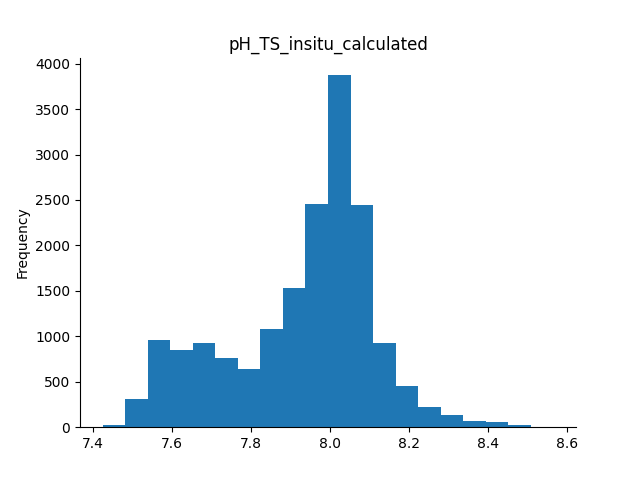

In [ ]:
from matplotlib import pyplot as plt
pH_year['pH_TS_insitu_calculated'].plot(kind='hist', bins=20, title='pH_TS_insitu_calculated')
plt.gca().spines[['top', 'right',]].set_visible(False)

**Figure 4**

This figure is showing the distibution of various pH levels. The data looks to be skewed to the left, with the pH being lower. A lower pH is more acidic, so this is telling us that there are more cases of acidic water.

I now want to see how the pH has changed over time, and compare that to CO2 emissions. We want to see if there is a relationship between the two.

In [ ]:
pH_year

,Year_UTC,pH_TS_insitu_calculated
1,2008,7.9743
2,2008,7.9977
3,2008,8.0398
4,2008,8.0659
5,2008,8.0661
...,...,...
28199,2017,7.8849
28201,2017,7.9567
28203,2017,7.9997
28204,2017,8.0176


In [ ]:
import seaborn as sns

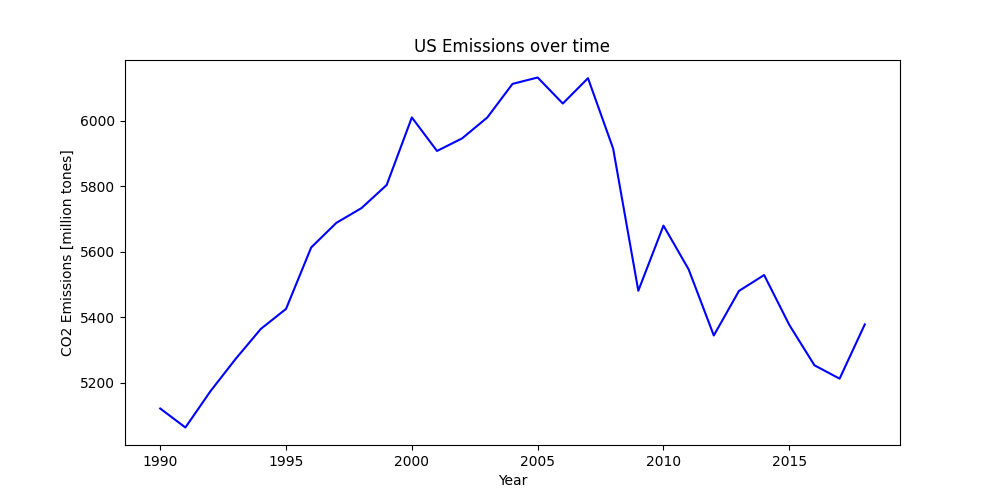

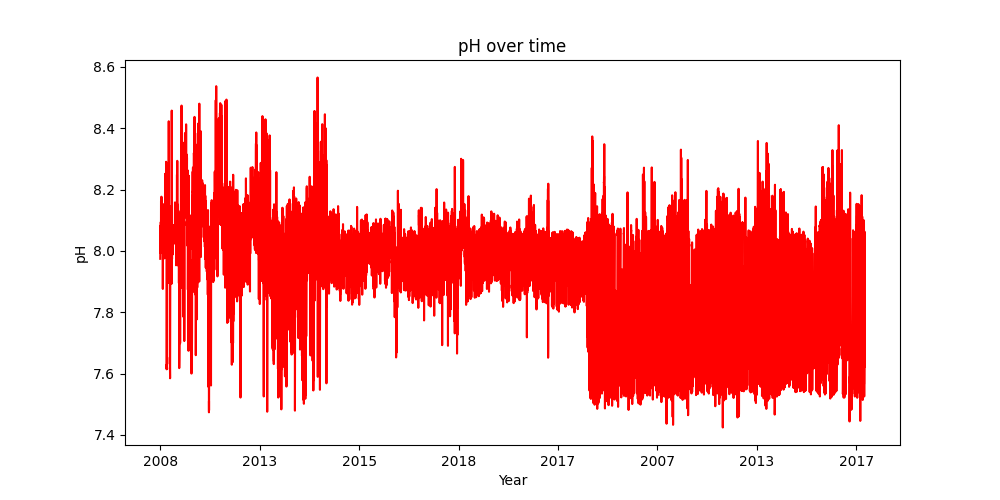

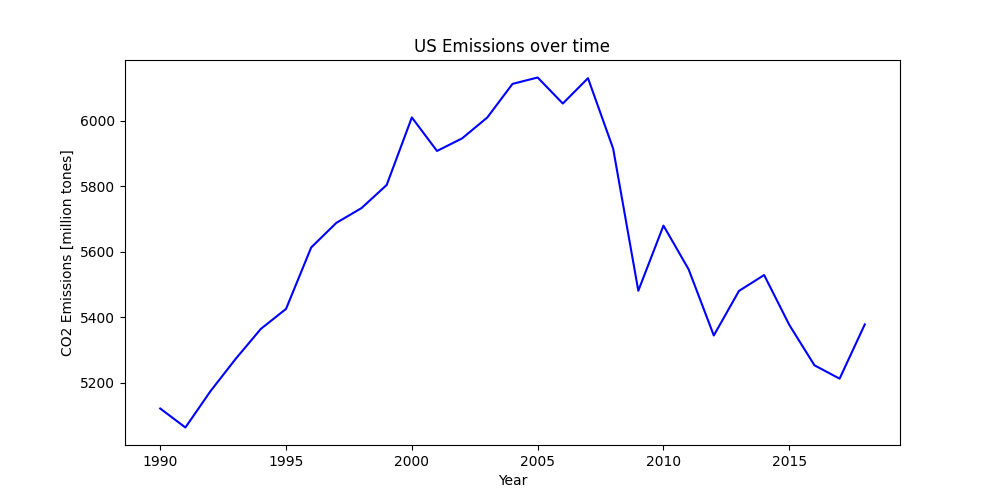

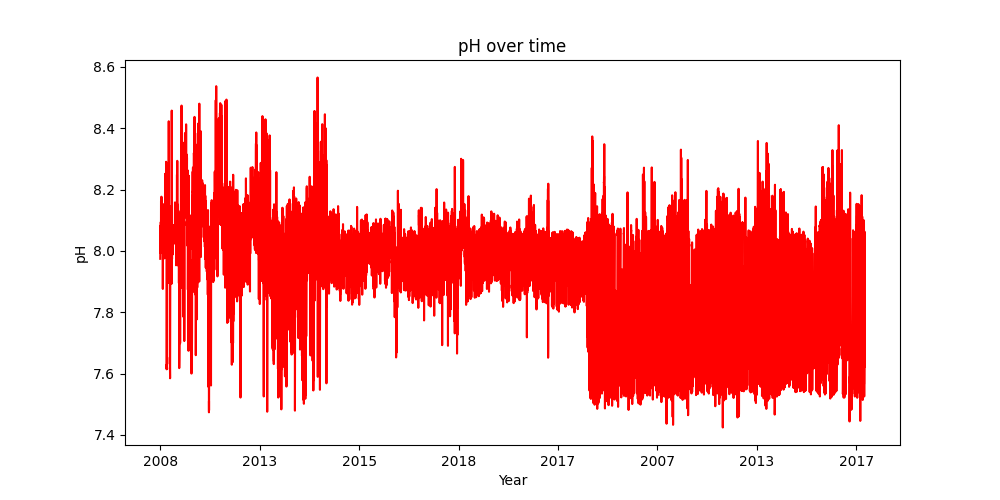

In [ ]:
#need pH_year and us_emissions

fig, ax = plt.subplots(figsize=(10, 5))
us_emissions.plot.line("year", "co2", xlabel="Year", ylabel="CO2 Emissions [million tones]", title = "US Emissions over time", color="blue", legend = False, ax=ax)
fig.show()

fig, ax = plt.subplots(figsize=(10, 5))
pH_year.plot.line("Year_UTC", "pH_TS_insitu_calculated", xlabel="Year", ylabel="pH", title = "pH over time", color="red", legend = False, ax=ax)
fig.show()

**Figure 5**

This figure is comparing the ocean's pH to CO2 emissions. Due to their scales being different, it is difficult to make a clear comparison between the two graphs. It is hard to identify a trend like this, but it is good to have the two graphed together to see if we can determine any correlations.

## Coral condition and global bleaching

We will now transition to coral reefs. We want to see how coral conditions have changed over time, and if we see increase bleaching with changing ocean temperatures and acidification.

In [ ]:
#this dataset shows a history of coral's condition from:
# https://catalog.data.gov/dataset/global-coral-bleaching-database-ncei-accession-0228498

zname = "https://www.nodc.noaa.gov/archive/arc0196/0228498/1.1/data/0-data/Global_Coral_Bleaching_Database.csv"
coral = pd.read_csv(zname)
coral
#this will give me a time series (tells me how the severity of bleaching changed over time


<ipython-input-20-e43997f056d3>:5: DtypeWarning:

Columns (6,11,14) have mixed types. Specify dtype option on import or set low_memory=False.



,RECORD_ID,COUNTRY,LOCATION,SITE_NAME,LATITUDE,LONGITUDE,DAY,MONTH,YEAR,DEPTH,...,PERCENT_MORTALITY,SURVEY_TYPE,SOURCE,CITATION,COMMENTS,DATA_POINT_OF_CONTACT,POC_E-MAIL_ADDRESS,CORAL_REGIONS,MIN_PERCENT_BLEACHED,MAX_PERCENT_BLEACHED
0,100001,Jamaica,NaN,NaN,17.898040,-76.814140,NaN,NaN,1963,NaN,...,NaN,NaN,ReefBase,NaN,"Some of the surviving corals bleached (Goreau,...",NaN,NaN,Caribbean/GoM,NaN,NaN
1,100002,Colombia,Providencia Island (Isla de Providencia),NaN,13.358333,-81.383333,NaN,NaN,1969,1-20m,...,NaN,NaN,ReefBase,NaN,NaN,NaN,NaN,Caribbean/GoM,NaN,NaN
2,100003,Puerto Rico,Puerto Rico,NaN,17.866667,-66.433333,NaN,NaN,1969,NaN,...,NaN,NaN,ReefBase,NaN,An intensive and extensive bleaching event occ...,NaN,NaN,Caribbean/GoM,NaN,NaN
3,100004,United States,Florida,Middle Sambo Reef,24.490000,-81.675000,NaN,NaN,1973,NaN,...,NaN,NaN,ReefBase,NaN,Millepora complanata showed the greatest incid...,NaN,NaN,Caribbean/GoM,NaN,NaN
4,100007,British Virgin Islands,Anegada,NaN,18.733333,-64.316667,NaN,NaN,1979,NaN,...,NaN,NaN,ReefBase,NaN,Actual cause of bleaching is not known. Partia...,NaN,NaN,Caribbean/GoM,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33239,CJ_528,Caribbean Netherlands,Bonaire,Mi Dushi,12.159920,-68.325850,NaN,NaN,2019,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Caribbean/GoM,0.000000,0.000000
33240,CJ_529,Caribbean Netherlands,Bonaire,Mi Dushi,12.159920,-68.325850,NaN,NaN,2019,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Caribbean/GoM,12.388503,12.388503
33241,CJ_530,Caribbean Netherlands,Bonaire,Ebo's Special,12.165780,-68.319250,NaN,NaN,2019,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Caribbean/GoM,0.704225,0.704225
33242,CJ_531,Caribbean Netherlands,Bonaire,Ebo's Special,12.165780,-68.319250,NaN,NaN,2019,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Caribbean/GoM,47.368421,47.368421


In [113]:
#only using data from the US

coral = coral.loc[(coral['COUNTRY'] == 'United States')]

#plot location and MAX_PERCENT_BLEACHED

us_bleaching = coral[['LOCATION','MAX_PERCENT_BLEACHED', 'YEAR']].dropna()
us_bleaching


df_group = us_bleaching.groupby("LOCATION")
us_bleaching = df_group[["YEAR", "MAX_PERCENT_BLEACHED"]]
us_bleaching = us_bleaching.mean().reset_index()
us_bleaching


,LOCATION,YEAR,MAX_PERCENT_BLEACHED
0,"Biscayne National Park, Florida",2015.000000,61.000000
1,"Broward County, Florida- 1st Reef",2005.000000,2.200000
2,"Broward County, Florida- 2nd Reef",2005.333333,13.866667
3,"Broward County, Florida- 3rdReef",2005.333333,9.666667
4,Florida,2012.681699,20.729932
...,...,...,...
83,"Reef Margin, Upper Keys, Florida",2005.437500,36.287500
84,"Reef Ridge Complex, Palm Beach, Florida",2006.000000,32.300000
85,Texas,2015.833333,11.255443
86,"Undetermined, Northern Trans, Florida",2005.666667,22.944444


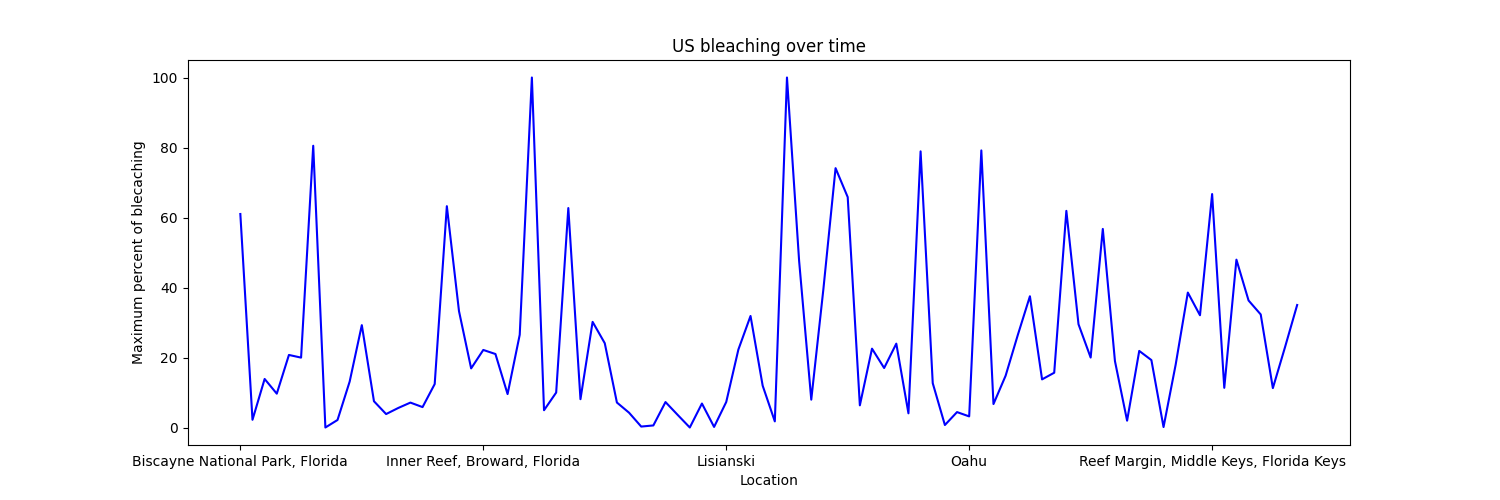

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
us_bleaching.plot.line("LOCATION", "MAX_PERCENT_BLEACHED", xlabel="Location", ylabel="Maximum percent of blecaching", title = "US bleaching over time", color="blue", legend = False, ax=ax)
fig.show()

**Figure 6**

This graph is showing how the maximum amount of bleaching changes for different reefs in the US. We can see that there is fluctuation of bleaching throughout time, but many areas have high bleaching levels. We can do further statistical analysis below.

In [119]:
bleaching_mean = us_bleaching["MAX_PERCENT_BLEACHED"].mean()
print(bleaching_mean)

24.06742337331248


In [120]:
us_bleaching.sort_values(by=['MAX_PERCENT_BLEACHED'])

,LOCATION,YEAR,MAX_PERCENT_BLEACHED
37,Lauderdale by the Sea,2014.0,0.000000
7,"Florida, Boca Raton",2014.0,0.000000
76,Pompano Beach,2014.5,0.125000
39,Lehua,2005.0,0.164725
33,Kaula,2006.0,0.267334
...,...,...,...
56,N. Florida Keys,2005.0,78.900000
61,"Oahu, Hawaii",2014.0,79.166667
6,Florida Keys National Marine Sanctuary,2015.0,80.500000
45,"Miami, Florida",2005.0,100.000000


The mean maximum amount of bleaching was about 24%. In 2005, two areas had 100% bleaching. Those areas are Miami, and the Upper Keys, both located in Florida. Interestingly, in 2014, Boca Raton and Lauderdale say 0% bleaching, which are also areas in Florida. This shows how bleaching can be highly variable, and is impacted by several factors, like location. Florida saw higher levels of bleaching in many areas in 2005. This gives us an idea for how bleaching is fluctuating, and tells us which areas in the US are impacted the most by it. Given that Florida is a coastal state surrounded by reefs, it would make sense for us to see trends like this. It would be interesting to explore this further to understand what caused these trends (did ocean temperatures change? acidification? tourist activity?).

The next dataset can be used to create a map showing where reefs are being threatened with ocean warming and bleaching. This will give us a better visual for where these events are occuring globally.

In [8]:
#global bleaching from: https://www.bco-dmo.org/dataset/773466
fname = "https://datadocs.bco-dmo.org/file/B11vA82u7y2Owp/global_bleaching_environmental.csv"
bleaching = pd.read_csv(fname)
bleaching

tot_bleaching = bleaching.filter(['ClimSST','Percent_Bleaching','Site_ID','Latitude_Degrees', 'Longitude_Degrees', 'Date_Year', 'Date_Month'], axis=1)
tot_bleaching = tot_bleaching.dropna()

tot_bleaching = tot_bleaching.sort_values(by=['Date_Year'])
tot_bleaching


<ipython-input-8-144ff743bd6a>:3: DtypeWarning: Columns (13,15,24) have mixed types. Specify dtype option on import or set low_memory=False.
  bleaching = pd.read_csv(fname)


,ClimSST,Percent_Bleaching,Site_ID,Latitude_Degrees,Longitude_Degrees,Date_Year,Date_Month
3748,262.15,30.5,2068,-27.1000,-109.3000,1980,6
1402,294.65,75,2069,-27.1667,-109.3333,1980,6
3792,297.41,30.5,2866,-1.2167,-90.3000,1983,5
1737,302.17,75,6970,7.8550,-82.0125,1983,1
1736,302.02,75,6969,7.8128,-81.7597,1983,1
...,...,...,...,...,...,...,...
21374,nd,0.0,15446,-8.3651,116.0844,2020,1
21371,nd,0.0,15445,-8.5326,119.6438,2020,3
21370,nd,0.0,15445,-8.5326,119.6438,2020,3
32797,nd,15,3886,-8.3376,116.0376,2020,2


In [9]:
#want to get rid of "nd"

tot_bleaching = tot_bleaching[tot_bleaching.ClimSST != "nd"]
tot_bleaching.loc[:,"ClimSST"]
tot_bleaching

,ClimSST,Percent_Bleaching,Site_ID,Latitude_Degrees,Longitude_Degrees,Date_Year,Date_Month
3748,262.15,30.5,2068,-27.1000,-109.3000,1980,6
1402,294.65,75,2069,-27.1667,-109.3333,1980,6
3792,297.41,30.5,2866,-1.2167,-90.3000,1983,5
1737,302.17,75,6970,7.8550,-82.0125,1983,1
1736,302.02,75,6969,7.8128,-81.7597,1983,1
...,...,...,...,...,...,...,...
14126,300.87,0,5540,2.6688,104.1753,2019,10
14168,262.15,0,5544,2.7924,104.1230,2019,10
11776,301.6,0,3600,-16.4570,-151.7758,2019,11
24806,302.03,0.5,5574,4.2142,118.6756,2019,7


In [10]:
tot_bleaching = tot_bleaching[tot_bleaching.Percent_Bleaching != "nd"]
tot_bleaching.loc[:,"Percent_Bleaching"]
tot_bleaching

,ClimSST,Percent_Bleaching,Site_ID,Latitude_Degrees,Longitude_Degrees,Date_Year,Date_Month
3748,262.15,30.5,2068,-27.1000,-109.3000,1980,6
1402,294.65,75,2069,-27.1667,-109.3333,1980,6
3792,297.41,30.5,2866,-1.2167,-90.3000,1983,5
1737,302.17,75,6970,7.8550,-82.0125,1983,1
1736,302.02,75,6969,7.8128,-81.7597,1983,1
...,...,...,...,...,...,...,...
14126,300.87,0,5540,2.6688,104.1753,2019,10
14168,262.15,0,5544,2.7924,104.1230,2019,10
11776,301.6,0,3600,-16.4570,-151.7758,2019,11
24806,302.03,0.5,5574,4.2142,118.6756,2019,7


In [ ]:
#converting objects to floats
tot_bleaching['ClimSST'] = tot_bleaching['ClimSST'].astype(float)
tot_bleaching['Percent_Bleaching'] = tot_bleaching['Percent_Bleaching'].astype(float)

<ipython-input-22-352f49e6e68f>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gp.datasets.get_path("naturalearth_lowres"))


<Axes: >

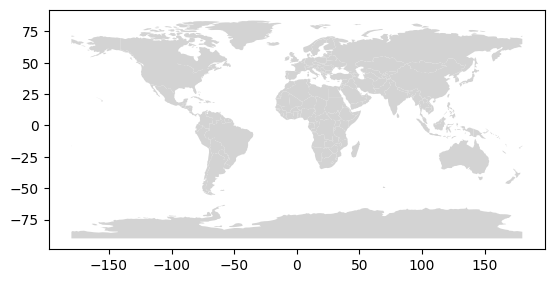

In [22]:
countries = gp.read_file(
               gp.datasets.get_path("naturalearth_lowres"))
countries.plot(color="lightgrey")


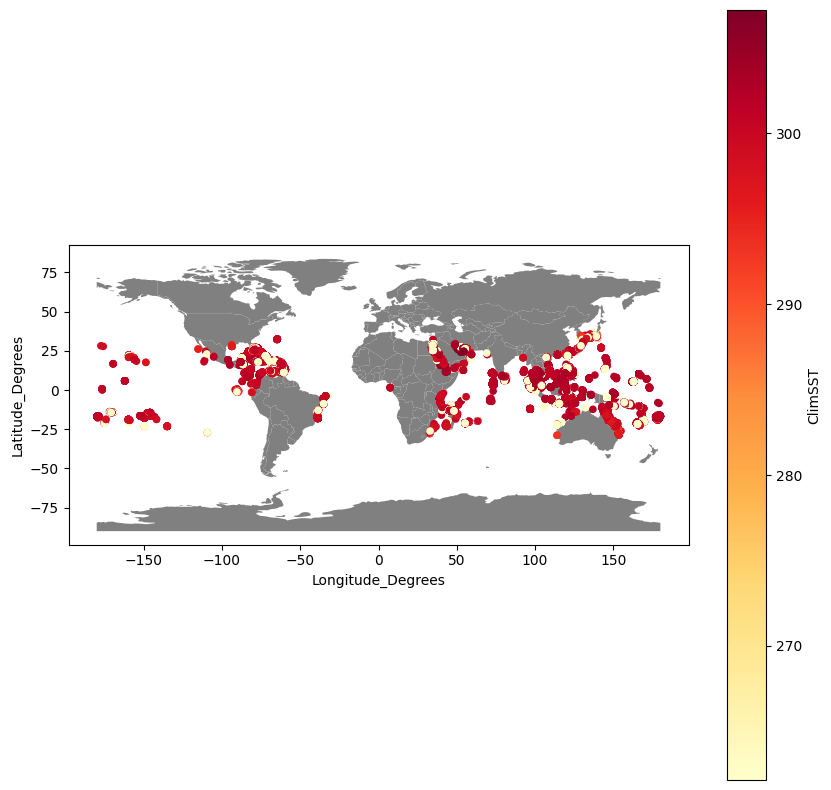

In [25]:
#here is a plot showing the water temperature of reefs globally

fig, ax = plt.subplots(figsize=(10, 10))
countries.plot(lw=1, ax=ax, color = "gray")
tot_bleaching.plot(x="Longitude_Degrees", y="Latitude_Degrees", kind="scatter", c="ClimSST",
                   colormap="YlOrRd", ax=ax, legend = False)
fig.show()

**Figure 8**

This figure shows us the SST of reefs around the world. We can use this and compare it to the map below, showing reef bleaching.

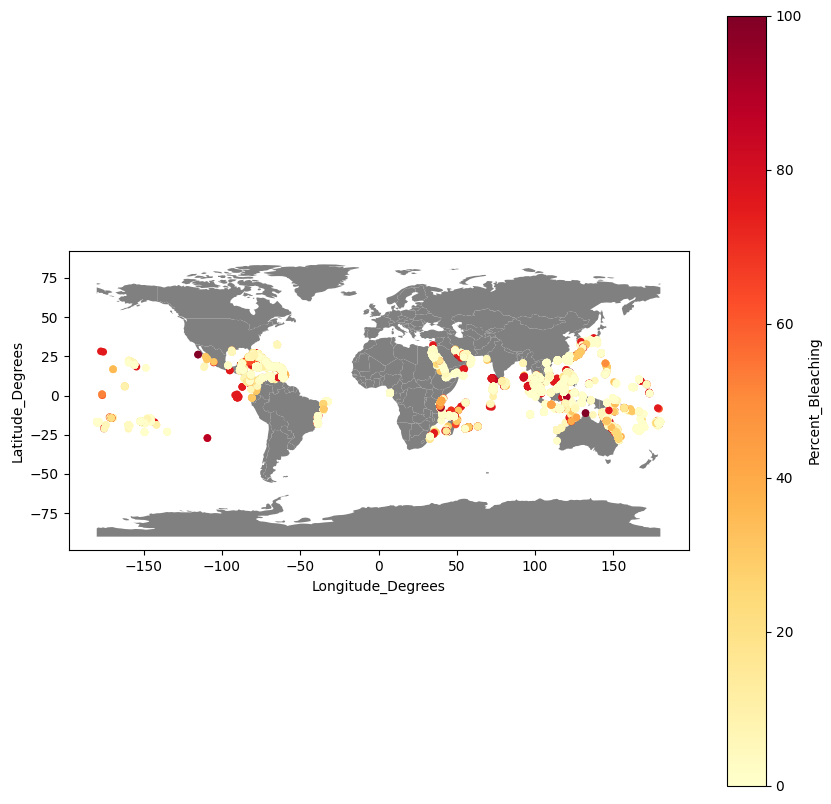

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))
countries.plot(lw=1, ax=ax, color = "gray")
tot_bleaching.plot(x="Longitude_Degrees", y="Latitude_Degrees", kind="scatter", c="Percent_Bleaching",
                   colormap="YlOrRd", ax=ax, legend = False)
fig.show()

**Figure 9**

This is a map showing how much reefs globally are experiencing bleaching. This is useful in identifying areas where more bleaching occurs. Comparing figures 8 and 9, we can see that areas with warmer temperatures experience more bleaching. This supports our finding from the previous discussion, but provides a better visual representation of the data.

We can use this dataset to also look at how bleaching and SST have changed over time. We touched on this previously, but this dataset makes it easier to compare the two along the same timescale.

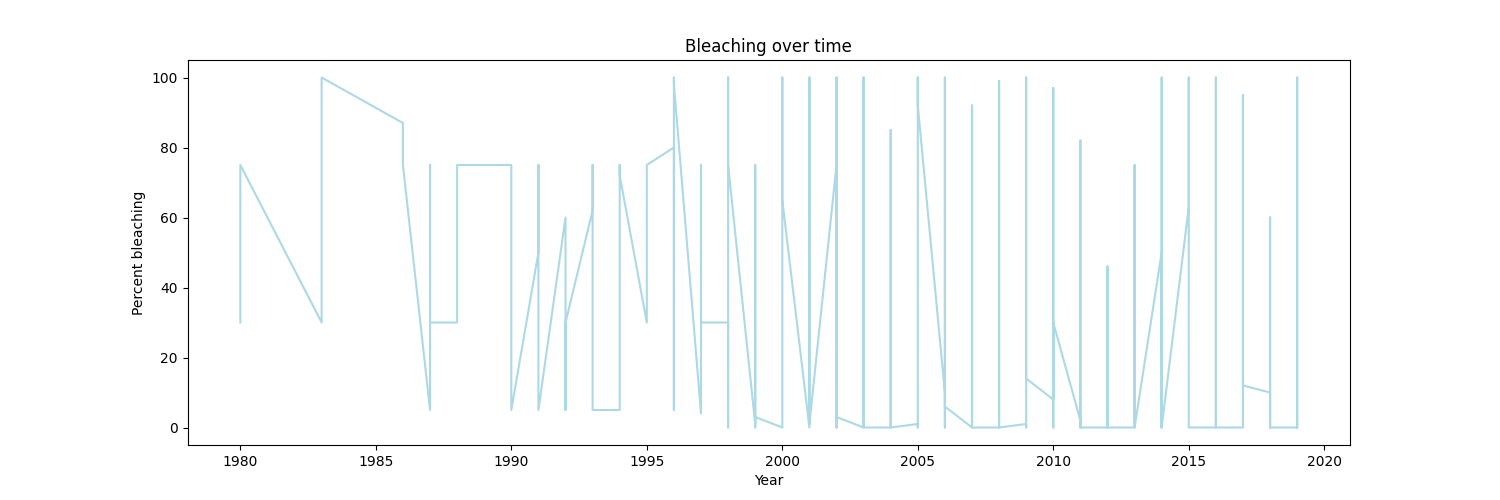

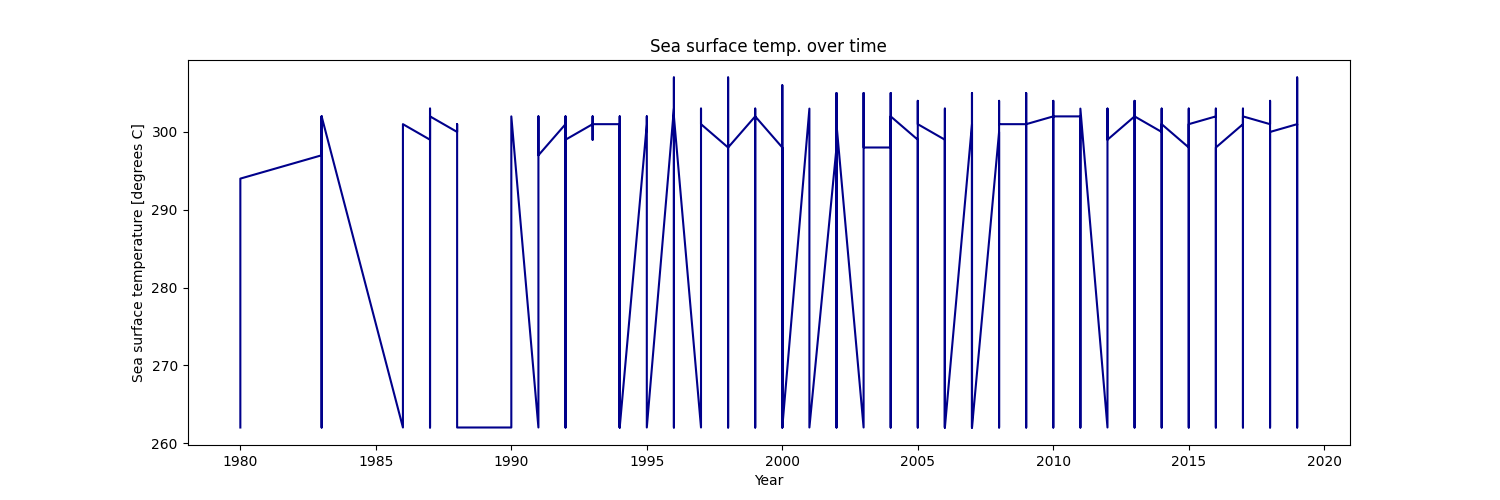

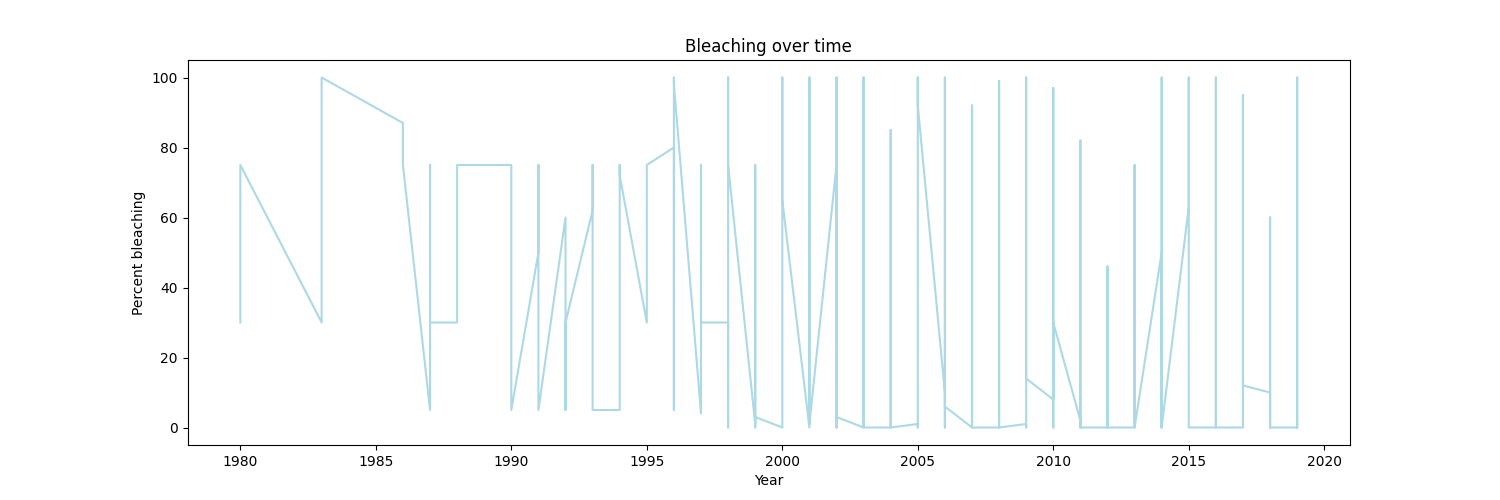

In [151]:
fig, ax = plt.subplots(figsize=(15, 5))
tot_bleaching.plot.line("Date_Year", "ClimSST", xlabel="Year", ylabel="Sea surface temperature [degrees C]", title = "Sea surface temp. over time", color="darkblue", legend = False, ax=ax)

fig, ax = plt.subplots(figsize=(15, 5))
tot_bleaching.plot.line("Date_Year", "Percent_Bleaching", xlabel="Year", ylabel="Percent bleaching", title = "Bleaching over time", color="lightblue", legend = False, ax=ax)

fig.show()

**Figure 10**

In [152]:
tot_bleaching.loc[:, 'ClimSST'].mean()

293.7400639163277

Figure 10 has two graphs, one plotting sea surface temperature (SST) over time, and the other plotting coral bleaching over time. Looking at the graphs, we can see that when there are higher sea surface temperatures, there is more bleaching. The average SST is about 293 degrees Celsius, which much warmer than many coral can tolerate. This shows us that increased water temperature does cause more bleaching.  

The final thing we can use this dataset is by running a regression model to look at variance within the model. Below is the regression analysis.

In [6]:
import statsmodels.formula.api as sm

In [26]:
model = sm.ols("Percent_Bleaching ~ ClimSST", data = tot_bleaching)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:      Percent_Bleaching   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     41.60
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           1.14e-10
Time:                        18:39:50   Log-Likelihood:            -1.5229e+05
No. Observations:               34420   AIC:                         3.046e+05
Df Residuals:                   34418   BIC:                         3.046e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.5959      2.168     10.886      0.0

From the regression analysis, we have a low r-squared value of 0.001. This implies that the data doesn't have much correlation, however, we need to take into account other random factors that could have caused this value.

##Deeper dive into Florida

Now, let's take a closer look at Florida. Florida is a coastal state surrounded by reefs, so we can analyze data specific to Florida to asses the condition of reefs here. There are many reefs located around Florida, so it will be a good area to look more in depth. You will need to download some files to do this file. Here is the link to the first file, which is a map of Florida: https://catalog.data.gov/dataset/tiger-line-shapefile-2019-state-florida-current-place-state-based

We will also be looking at a shapefile of coral habitats in Florida, so you will need to download that file as well. Here is the link for it:https://geodata.myfwc.com/datasets/myfwc::coral-and-hard-bottom-habitats-in-florida/explore?location=25.021146%2C-81.350168%2C8.79

In [ ]:
!unzip /content/tl_2019_12_place.zip

In [ ]:
zname = 'https://www2.census.gov/geo/tiger/TIGER2019/PLACE/tl_2019_12_place.zip'
florida = gp.read_file(zname)

In [ ]:
!unzip /content/Coral_and_Hard_Bottom_Habitats_in_Florida.zip


In [ ]:
zname = "Coral_and_Hard_Bottom_Habitats_in_Florida.shp"
florida_reefs = gp.read_file(zname)

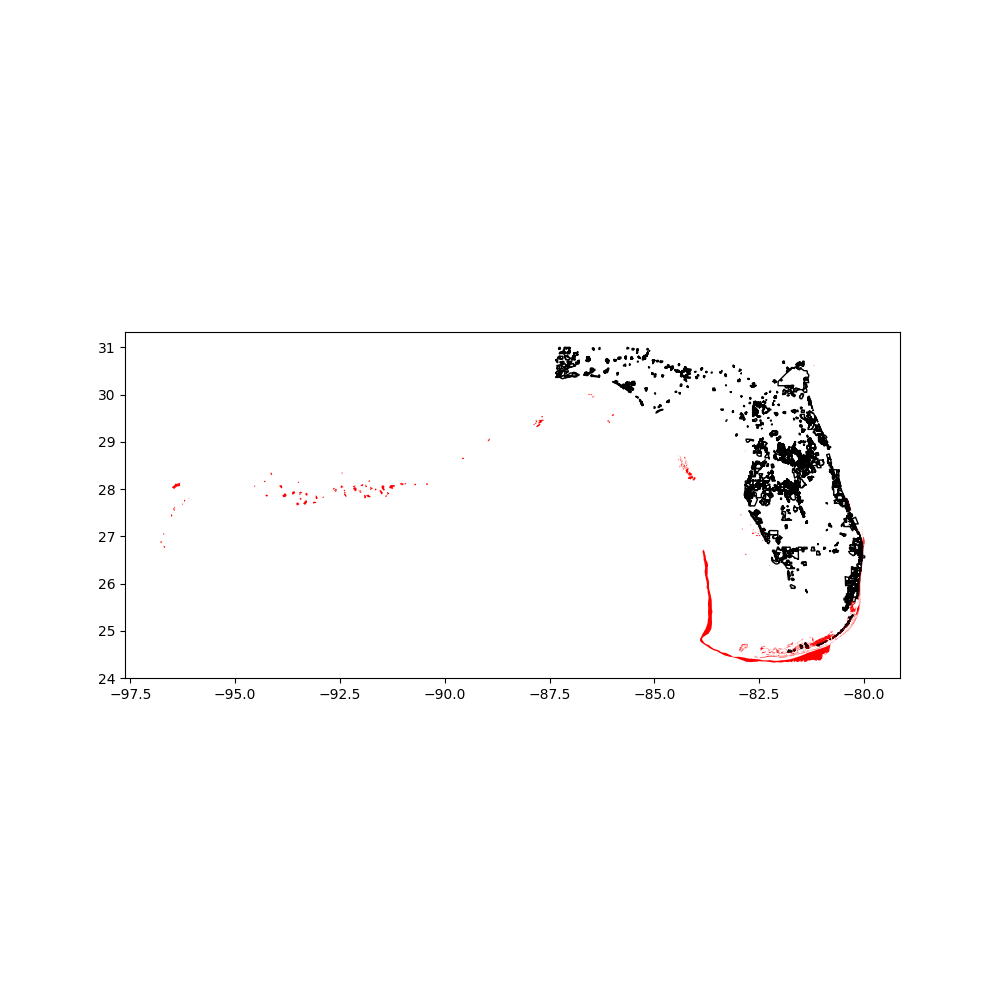

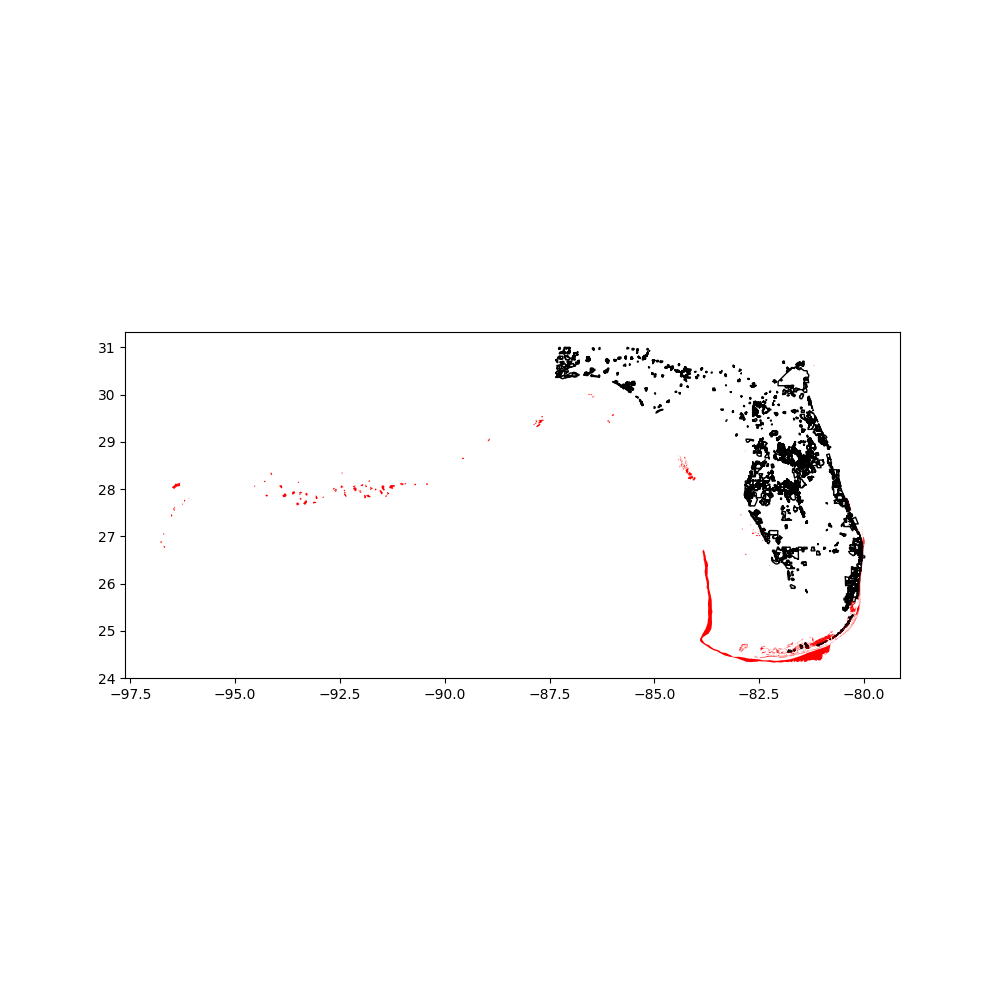

In [ ]:
#combing the two maps of florida and its reefs
#red indicates reefs

fig, ax = plt.subplots(figsize=(10, 10))
florida.plot(facecolor="none", lw=1, ax=ax)
florida_reefs.plot(facecolor = "none", lw = 1, ax = ax, color = "red")
fig.show()

**Figure 11**

This is a map of Florida showing where reefs are located. Reefs are indicated in red. This provides a visual representation of the area I will now be looking at.

One of the major reef systems in Florida is Crocker reef, found along the Florida keys. It is home to many species like fish, shrimp, and eels. These species rely on this reef as habitat, so it is vital for it to be protected. In the final part of our analysis, we will look at how its pH has changed over time, and assess if the reef is at risk for bleaching. This information can be useful in mitigation efforts and aid in restoration measures.

We will be looking deeper in Crocker reefs, and you will need to download and unzip the data file to access the information. Here is the link for the data: https://coastal.er.usgs.gov/data-release/doi-P90NCI8T/

In [4]:
!unzip /content/Crocker-Reef-OCSv1-07192013-to-10272014.zip

Archive:  /content/Crocker-Reef-OCSv1-07192013-to-10272014.zip
  inflating: Crocker-Reef-OCSv1-07192013-to-10272014.csv  
  inflating: Crocker-Reef-OCSv1-metadata.txt  
  inflating: Crocker-Reef-OCSv1-metadata.xml  


In [37]:
tname = "/content/Crocker-Reef-OCSv1-07192013-to-10272014.csv"
crocker = pd.read_csv(tname)
crocker

,Site Description,Latitude,Longitude,DATETAG,TIMETAG,T(W) (C),QF_T(W),PRESS (dbar),QF_PRESS,SALINITY,...,pHT,QF_pHT,CO2 (ppm),QF_CO2,PRES(IRGA) (mbar),QF_PRES(IRGA),OXYGEN (mg/L),QF_OXYGEN,PAR (microEinsteins),QF_PAR
0,Crocker Reef Florida Keys USA,24.90913,-80.52644,07/19/13,0:30:04,28.20,1,3.737,1,35.92,...,8.025,1,404.9,1,1043.0,1,5.71,1,0.0,1
1,Crocker Reef Florida Keys USA,24.90913,-80.52644,07/19/13,1:30:04,28.23,1,3.823,1,35.97,...,8.021,1,410.7,1,1043.0,1,5.67,1,0.0,1
2,Crocker Reef Florida Keys USA,24.90913,-80.52644,07/19/13,2:30:04,28.25,1,3.902,1,36.01,...,8.016,1,415.6,1,1043.0,1,5.62,1,0.0,1
3,Crocker Reef Florida Keys USA,24.90913,-80.52644,07/19/13,3:30:04,28.27,1,3.975,1,36.03,...,8.016,1,414.4,1,1043.0,1,5.67,1,0.0,1
4,Crocker Reef Florida Keys USA,24.90913,-80.52644,07/19/13,4:30:04,28.28,1,4.160,1,36.04,...,8.021,1,409.6,1,1043.0,1,5.79,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5225,Crocker Reef Florida Keys USA,24.90913,-80.52644,10/27/14,19:30:06,27.27,1,4.059,1,34.58,...,8.076,1,402.4,1,1003.0,1,4.38,1,0.0,1
5226,Crocker Reef Florida Keys USA,24.90913,-80.52644,10/27/14,20:30:06,27.35,1,4.285,1,34.58,...,8.080,1,397.2,1,1003.0,1,4.61,1,0.0,1
5227,Crocker Reef Florida Keys USA,24.90913,-80.52644,10/27/14,21:30:06,27.34,1,4.311,1,34.59,...,8.074,1,401.6,1,1003.0,1,4.32,1,0.0,1
5228,Crocker Reef Florida Keys USA,24.90913,-80.52644,10/27/14,22:30:06,27.32,1,4.361,1,34.61,...,8.079,1,387.6,1,1004.0,1,4.71,1,0.0,1


In [ ]:
#crocker co2 over time
fig = px.line(crocker, x = "DATETAG", y = "CO2 (ppm)", title = "Crocker CO2 over time", color_discrete_sequence=["red"],
              labels = dict(CO2 = "CO2 (ppm)", Date = "DATETAG"), width = 900, height = 500 ) \
              .update_traces(line = dict(width = 0.75)) \
              .update_layout(plot_bgcolor = "whitesmoke", hoverlabel = dict(bgcolor = "whitesmoke"))
fig.show()

**Figure 12**

This shows us how CO2 levels in Crocker have changed from July of 2013 to October of 2014. There is a in August, between August 23rd and September first, where the graph makes a sharp decline. This is likely due to the absensce of data during this time period, so we can ignore that part of the graph. The overall trend shows CO2 being within the 400 ppm range. We can compare this to a pH graph, seeing if pH increase with more CO2 present.

In [ ]:
#looking at crocker's pH over time

fig = px.line(crocker, x = "DATETAG", y = "pHT", title = "Crocker pH over time", color_discrete_sequence=["darkblue"],
              labels = dict(pH = "pH", Date = "DATE"), width = 900, height = 500 ) \
              .update_traces(line = dict(width = 0.75)) \
              .update_layout(plot_bgcolor = "whitesmoke", hoverlabel = dict(bgcolor = "whitesmoke"))
fig.show()

**Figure 13**

Looking at this graph, we can see that Crocker's pH fluctuates, but saw an increase in September 2013. Then, it drops again in January 2014. We need to take into account seasonal fluctuations, but overall this graph is tellling us that Crocker's pH is betweeen 8 and 8.1, which is fairly acidic.

The final graph we will look it is water temperature over time.

In [39]:
crocker['T(W) (C)']
fig = px.line(crocker, x = "DATETAG", y = "T(W) (C)", title = "Crocker temperature over time [degrees C]", color_discrete_sequence=["green"],
              labels = dict(Temperature = "T(W) (C)", Date = "DATETAG"), width = 900, height = 500 ) \
              .update_traces(line = dict(width = 0.75)) \
              .update_layout(plot_bgcolor = "whitesmoke", hoverlabel = dict(bgcolor = "whitesmoke"))
fig.show()

**Figure 14**

This is a graph showing Crocker's temperature from 07/2013 to 10/2014. We can see that its temperature remains steady around 30 degrees Celsius, but around 09/02/2013 the temperature drops, and gets as low as 21 degrees C in June of 2014. This could be a seasonal fluctuation, where the water temperature is warmer in the summer, but then starts to cool down as the weather gets colder. The temperature then spikes up again around June 30 2014, continuing to increase until October of 2014, where it decreases again. This graph is showing us that seasonal fluctuations do occur, but the average temperature is around 29 degrees C (about 84 degrees Celsius). This is on the border of coral's ideal temperature (between 73 and 84 Celsius), so if the temperature continues to increase, we may see higher levels of bleaching, due to the temperature being outside of the coral's zone of tolerance.

In [11]:
mean = crocker["T(W) (C)"].mean()
print(mean)

28.929116634799236


From figures 12 -14, we can assert that Crocker reef is a risk for bleaching. It has low pH levels, implying acidic water. This acidity will not only cause coral to break down, but it will also put them under stress, leading to coral bleaching. Higher water temperatures will also lead to more bleaching, and based on the graphs we made, we can see that Crocker is at the edge of the ideal water temperature. More bleaching could result in the loss of many other species who rely on the reef. To try and prevent this, restoration and mitigation projects should occur in this area. Coral replanting and monitoring are vital in reducing bleaching chances, but overall we can't control the ocean temperature unless we change our emission levels, and that will require further mitigation in the future.

# **Conclusion**
From out data analysis, we are able to see that CO2 emissions have been steadily rising. As these emissions increase, we can expect various environmental effects to occur. We can see that ocean temperatures are beginning to rise, and the ocean is becoming more acidic as it's exposed to more CO2. These combined effects lead to increased rates of coral bleaching, which decimates ecosystems and causes a loss in biodiversity. Further analysis is needed to determine how bleaching effects various marine populations, and we also need to do further analysis on bleaching trends overall. Our regression model says there is a low chance bleaching is caused by elevates water temperatures, but the literature says otherwise; so more analysis here is needed. We also know that based on the trends we're seeing in Crocker reef, that area is likely to experience bleaching, so mitigation is needed to lessen its impact. This could mean creating reef restoration programs, replanting corals, and creating proteted areas where the reefs cannot be harmed (overfished, touched by tourists, etc.). These efforts are crucial in maintaining reef populations, and ensuring the safety of these valuable marine ecosystems.


# **References**
Dempsey, C. (2023). Mapping Coral Bleaching with Satellites. *Geography Realm*. https://www.geographyrealm.com/mapping-coral-bleaching/

Florida Fish and Wildlife Conservation Comissions (2015). *Coral and Hardbottom Habitats in Florida* [Dataset]. https://geodata.myfwc.com/datasets/myfwc::coral-and-hard-bottom-habitats-in-florida/about

Florida Fish and Wildlife Conservation Commission (n.d.). *Unified Reef Map* [Dataset]. https://ocean.floridamarine.org/integratedreefmap/unifiedreeftract.htm

Jiang, Li-Qing; Feely, Richard A.; Wanninkhof, Rik; Greeley, Dana; Barbero, Leticia; Alin, Simone R.; Carter, Brendan R.; Pierrot, Denis; Featherstone, Charles; Hooper V, James A.; Melrose, Donald C.; Monacci, Natalie M.; Sharp, Jonathan D.; Shellito, Shawn M.; Xu, Yuan-Yuan; Kozyr, Alex; Byrne, Robert H.; Cai, Wei-Jun; Cross, Jessica N.; Johnson, Gregory C.; Hales, Burke; Langdon, Chris; Mathis, Jeremy T.; Salisbury, Joseph E.; Townsend, David W. (2020). *Coastal Ocean Data Analysis Product in North America (CODAP-NA, Version 2021) (NCEI Accession 0219960)*[Dataset]. NOAA National Centers for Environmental Information. https://doi.org/10.25921/531n-c230

Lindsey, R. (2023). Climate Change: Atmospheric Carbon Dioxide. *NOAA*. https://www.climate.gov/news-features/understanding-climate/climate-change-atmospheric-carbon-dioxide#:~:text=Without%20carbon%20dioxide%2C%20Earth's%20natural,causing%20global%20temperature%20to%20rise

Lindsey, R. & Dahlman L. (2023). Climate Change: Ocean Heat Content. *NOAA*. https://www.climate.gov/news-features/understanding-climate/climate-change-ocean-heat-content

NOAA (2023). **Global Coral Bleaching* [Dataset]. https://catalog.data.gov/dataset/global-coral-bleaching-database-ncei-accession-0228498

NOAA (2023). What is Ocean Acidification? *National Ocean Service*. https://oceanservice.noaa.gov/facts/acidification.html#:~:text=Ocean%20acidification%20refers%20to%20a,CO2)%20from%20the%20atmosphere

Ritchie, H et al.(n.d). *co2-data* [Dataset]. Our World in Data.   https://github.com/owid/co2-data/blob/master/owid-co2-codebook.csv

Thiem, H. (2023). NOAA Employs Climate Adaptation and Resilience Techniques to Save Florida Corals From This Summer's Record-Long Heat Wave. *NOAA*.  https://www.climate.gov/news-features/event-tracker/noaa-employs-climate-adaptation-and-resilience-techniques-save-florida

van Woesik, R., Burkepile, D. (2022) Bleaching and environmental data for global coral reef sites from 1980-2020. Biological and Chemical Oceanography Data Management Office (BCO-DMO). (Version 2) Version Date 2022-10-14.
doi:10.26008/1912/bco-dmo.773466.2

Yates, K.K., Moore, C.S., and Smiley, N.A. (2019). *Time series of autonomous carbonate system parameter measurements from Crocker Reef, Florida.* [Dataset] USA: U.S. Geological Survey data release, https://doi.org/10.5066/P90NCI8T